In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.transforms as mtransforms
import seaborn as sns
from scipy.stats.stats import pearsonr
import datetime as dt
from datetime import timedelta

In [2]:
class Time_list_month:
	def __init__(self, list_of_stock_prices):
		self.list_of_stock_prices = list_of_stock_prices

	def time_return(self):
		some_day = dt.datetime(year=1999, month=12, day=26)
		time = [] #зберігатиме число місяців, які пройшли з початку торгівлі
		for i in range(len(self.list_of_stock_prices)):
			some_day += timedelta(days=7)
			time.append(some_day)
		return time 

In [3]:
plt.rc('font',family='Times New Roman', size=12)
name=['Gold.csv','SP500.csv','EURONEXT.csv', 'HANGSENG.csv', 'KOSPI.csv', 'NIKKEI.csv', 'SENSEX.csv', 'SSE.csv']
# name=['CrudeOil.csv','SP500.csv','EURONEXT.csv', 'HANGSENG.csv', 'KOSPI.csv', 'NIKKEI.csv', 'SENSEX.csv', 'SSE.csv']
# 'CrudeOil.csv'

In [4]:
def correlation(name):
	prices_1 = pd.read_csv(name[0], index_col=0, parse_dates=True, na_values='.',infer_datetime_format=True,squeeze=True).fillna(method ='pad')
	index_name_0=''
	for j in range(len(name[0])-4):
		index_name_0 = index_name_0 + name[0][j]

	df = prices_1.to_frame()
	weekly_return_1 = df.pct_change(1)

	time = Time_list_month(weekly_return_1)
	time = time.time_return()

	for i in range(1,len(name)):
		prices_2 = pd.read_csv(name[i], index_col=0, parse_dates=True, na_values='.',infer_datetime_format=True,squeeze=True).fillna(method ='pad')
		prices_2.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis='columns', inplace=True)
		weekly_return_2 = prices_2.pct_change(1)
		corr=[]
		index_name = ''
		for j in range(len(name[i])-4):
			index_name = index_name + name[i][j]

		p_list = []
		for s in range(40,len(weekly_return_1['Close'])):
			x = []
			y=[]
			for k in range(39,-1,-1):
				x.append(weekly_return_1['Close'][s-k])
				y.append(weekly_return_2['Close'][s-k])
			p_list.append(pearsonr(x,y)[1])
			corr.append(pearsonr(x,y)[0])

		max_corr = max(corr)
		min_corr = min(corr)

		p_list=np.array(p_list)
		time=np.array(time)
		for t in range(40):
			p_list= np.insert(p_list, 0, 'NaN', axis=0)
			corr= np.insert(corr, 0, 'NaN', axis=0)
		
		p1 = plt.plot(time,p_list,color='navy',linewidth=0.5)
		plt.plot(time,p_list,color='navy', linewidth=0.5)
		plt.gcf().set_size_inches(8, 4.5)
		ax = plt.gca()
		ax.set_xlim(xmin=time[0], xmax=time[-1]) 
		ax.set_ylabel('p-value')
		ax.set_xlabel('Дата') 
		ax.fill_between(time,0,1.05,where=p_list>0.05,color='r', alpha=0.3)
		p2 = ax.fill(np.NaN, np.NaN, 'r', alpha=0.3)
		plt.legend((p2[0], p1[0]), ('p-value>0.05', 'p-value'),loc=2,edgecolor='none')

		ax.set_title('Значущість коефіцієнта кореляції '+index_name_0+'&'+index_name+'\n')
		ax.spines["right"].set_visible(False)
		ax.spines["top"].set_visible(False)
		plt.show()
		file_name = 'p_'+index_name_0+'&'+index_name
# 		plt.savefig(file_name)
		plt.close()

		corr=np.array(corr)
		print(corr)
		plt.plot(time,corr,color='black', linewidth=1, marker='')
		plt.gcf().set_size_inches(10, 4.5)
		ax = plt.gca()  
		ax.set_xlim(xmin=time[0], xmax=time[-1])
		ax.set_ylabel('Кореляція (40w)')
		ax.set_xlabel('Дата')
		ax.set_title('Динаміка коефіцієнта кореляції (40w) '+index_name_0+'&'+index_name,size=17)
		ax.fill_between(time,min_corr,max_corr,where=corr<=-0.296,color='deepskyblue', alpha=0.5)
		p2 = ax.fill(np.NaN, np.NaN, 'deepskyblue', alpha=0.3)
		ax.fill_between(time,min_corr,max_corr,where=corr>=0.296,color='lime', alpha=0.5)
		p3 = ax.fill(np.NaN, np.NaN, 'lime', alpha=0.3)
		plt.legend((p3[0],p2[0], p1[0]), ('corr>=0.296','corr<=-0.296', 'corr'),loc=2,edgecolor='none')
		ax.spines["right"].set_visible(False)
		ax.spines["top"].set_visible(False)
		file_name = 'corr'+index_name_0+'&'+index_name
# 		plt.savefig(file_name)
		plt.show()
		plt.close()

c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


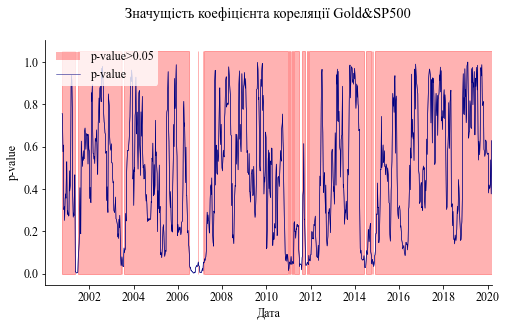

[        nan         nan         nan ... -0.10040965 -0.14371469
 -0.0789384 ]


c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


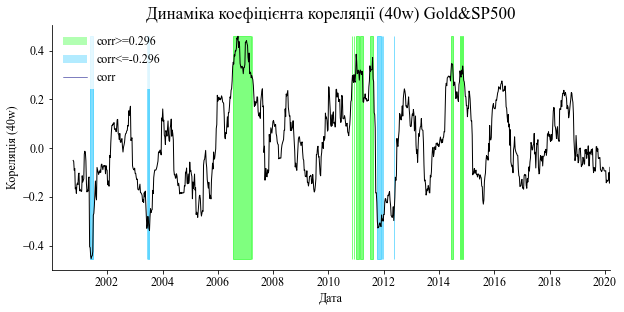

c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


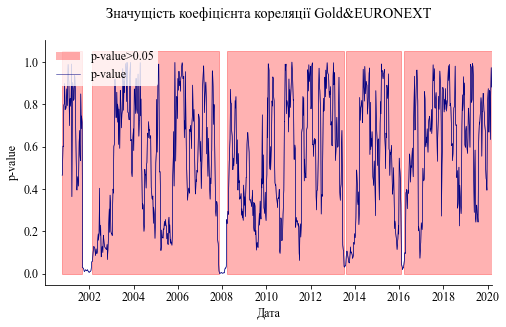

[        nan         nan         nan ...  0.03221069  0.00550826
 -0.02439194]


c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


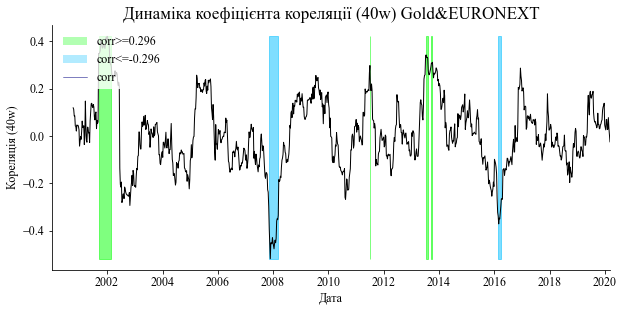

c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


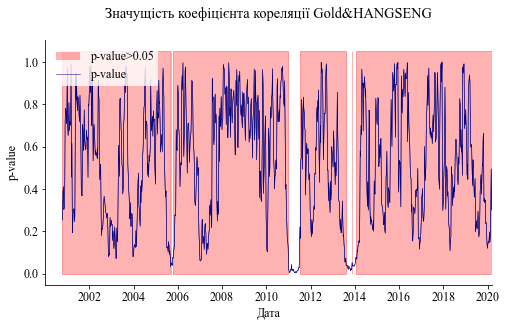

[       nan        nan        nan ... 0.17826677 0.11129844 0.1675652 ]


c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


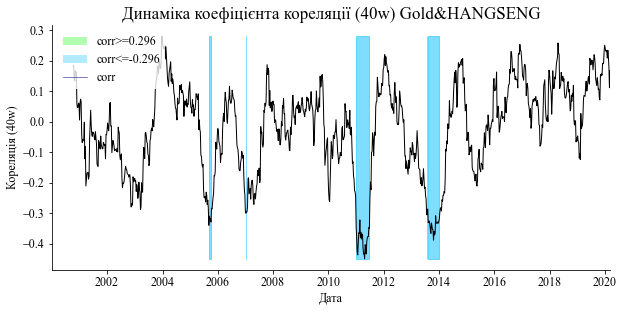

c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


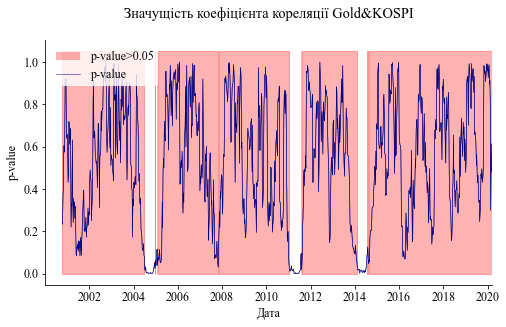

[        nan         nan         nan ... -0.16856953 -0.08230555
 -0.11479686]


c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


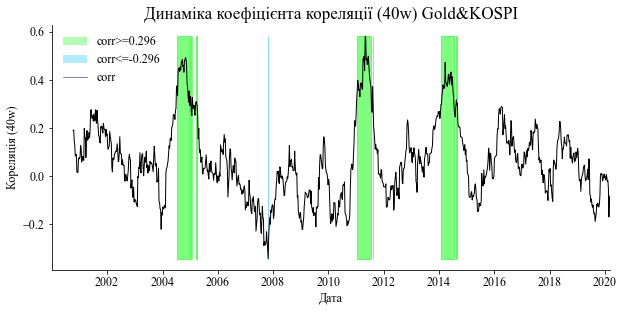

c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


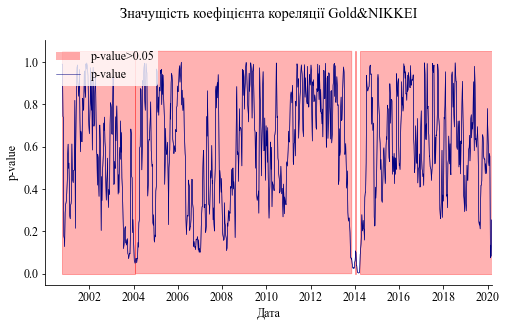

[       nan        nan        nan ... 0.2404377  0.27805474 0.18470448]


c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


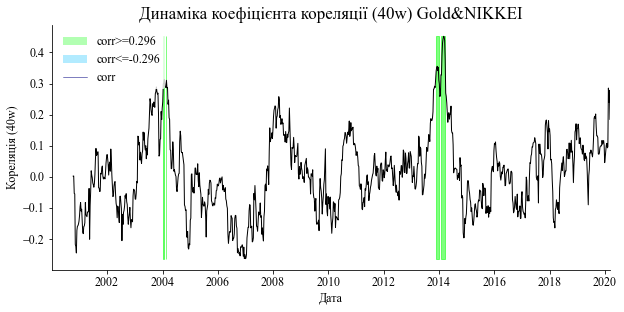

c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


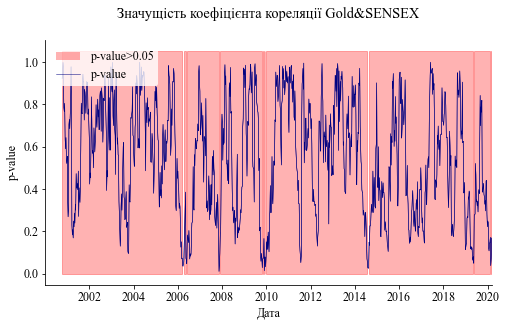

[        nan         nan         nan ... -0.32921944 -0.28943732
 -0.22217849]


c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


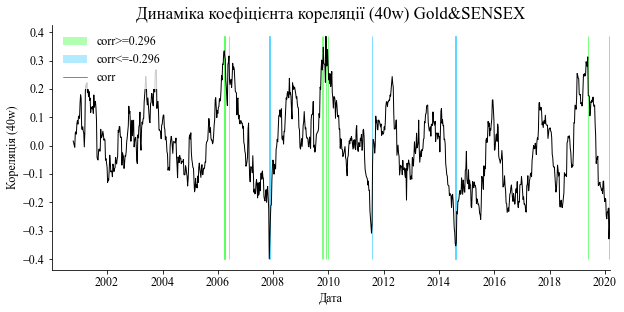

c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


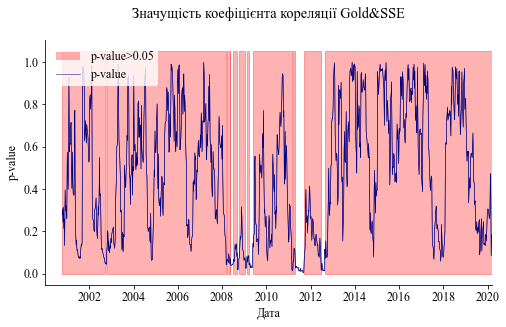

[       nan        nan        nan ... 0.1206282  0.27537597 0.21401109]


c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in less_equal
c:\users\виктор\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


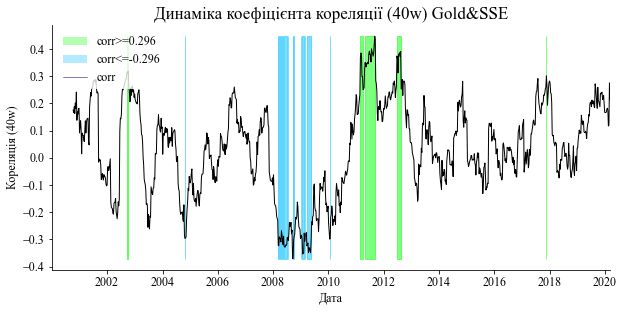

In [6]:
correlation(name)